In [291]:
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [292]:
X = pd.read_excel ('Official_Foreign_Exchange_Rates_NBRK_on_15_03_2020.xls', delimiter = ';')

In [293]:
def graph(mas):
    values = mas['USD'].values
    N = len(values)
    t = (N + 1) // 6
    r = 13
    X1 = [values [i: N - t + i] for i in range(t)]
    X1 = np.array(X1)

    cov_m = np.cov(X1)
    val, vec = np.linalg.eig(cov_m)
    vec = vec[:r]
    Z = vec.transpose()
    Z = Z.dot(X1[:r])

    X2 = vec.dot(Z)
    real = np.hstack((X1[0][:t], X1[t - 1]))
    prediction = np.hstack((X2[0][:t], X2[r - 1]))

    plt.plot(real)
    plt.plot(prediction)
    plt.show()

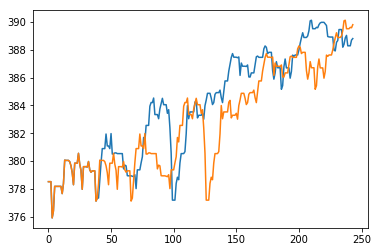

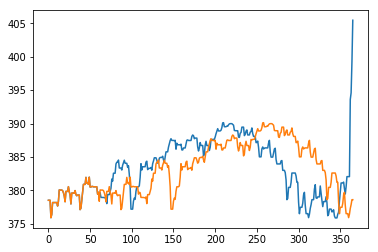

In [294]:
graph(X[:244])
graph(X)